## Run Simulator - Experimento 1

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#python3 simulador_input.py modelo tipo_de_Grafo cant_nodos grado_salida seed prob_inc cant_it repet nombrearch

modelo = ['SIS', 'SIRS', 'SIR']
porc_incub = ['0.01', '0.02', '0.1'] #500, 1000, 5000
grado = ['1','10','100','1000']
seed = 1


for m in modelo:
    for pi in porc_incub:
        for g in grado:
            arg = 'python3 simulador_input.py ' + m + ' random 50000 ' + g + ' ' + str(seed) + ' ' + pi + ' 200 5 ' + m +'_random.csv'
            print(arg)
            seed+=1
#             os.system(arg)

python3 simulador_input.py SIS random 50000 1 1 0.01 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 10 2 0.01 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 100 3 0.01 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 1000 4 0.01 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 1 5 0.02 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 10 6 0.02 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 100 7 0.02 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 1000 8 0.02 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 1 9 0.1 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 10 10 0.1 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 100 11 0.1 200 5 SIS_random.csv
python3 simulador_input.py SIS random 50000 1000 12 0.1 200 5 SIS_random.csv
python3 simulador_input.py SIRS random 50000 1 13 0.01 200 5 SIRS_random.csv
python3 simulador_

## Funciones auxiliares

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


modelos = ['SIS', 'SIRS', 'SIR']
pis = [0.01, 0.02, 0.1] #500, 1000, 5000
grados = [1,10,100,1000]


plt.rcParams.update({'font.size': 15})

#Carga de datos
df_SIS = pd.read_csv('./resultados/SIS_random.csv')
df_SIRS = pd.read_csv('./resultados/SIRS_random.csv')
df_SIR = pd.read_csv('./resultados/SIR_random.csv')

def mostrar_tabla_gr_pi(df, grado, pi):
    df_gr = df.loc[df['gr'] == grado].reset_index(drop=True)
    df_gr_pi = df_gr[df_gr['pi'] == pi].reset_index(drop=True)
    return df_gr_pi

def mostrar_tabla(df, pi):
    df_gr_pi = mostrar_tabla_gr_pi(df, 100, pi)
    return df_gr_pi


def tabla_infectados(grado, pi, modelo):
    df_aux = pd.DataFrame()
    if modelo == 'SIS':
        df_aux = mostrar_tabla_gr_pi(df_SIS, grado, pi)
    elif modelo == 'SIRS':
        df_aux = mostrar_tabla_gr_pi(df_SIRS, grado, pi)
    elif modelo == 'SIR':
        df_aux = mostrar_tabla_gr_pi(df_SIR, grado, pi)
    
    df_aux['inf_tot'] = df_aux['i_mild']+ df_aux['i_grave']

    df = pd.DataFrame({
    'iteracion': df_aux.index,
    'porcentaje_poblacion': df_aux['inf_tot'],
    'muertos': df_aux['muertos'],
    })
    
    return df

def graficar_subplots(funcion_graficar, title, x_title, y_title):
    
    fig, axs = plt.subplots(4, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0.15, 'wspace': 0}, figsize=(15,15))

    for ax in axs.flat:
        ax.set(xlabel=x_title, ylabel=y_title)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    fig.suptitle(title, y=0.93) #Y para la posicion del titulo

    i = 0
    for gr in grados:
        j = 0
        for pi in pis:
            funcion_graficar(gr,pi, axs[i,j])
            j+=1
        i+=1

## Evolucion de casos SIR vs SIRS vs SIS variando grado y PI

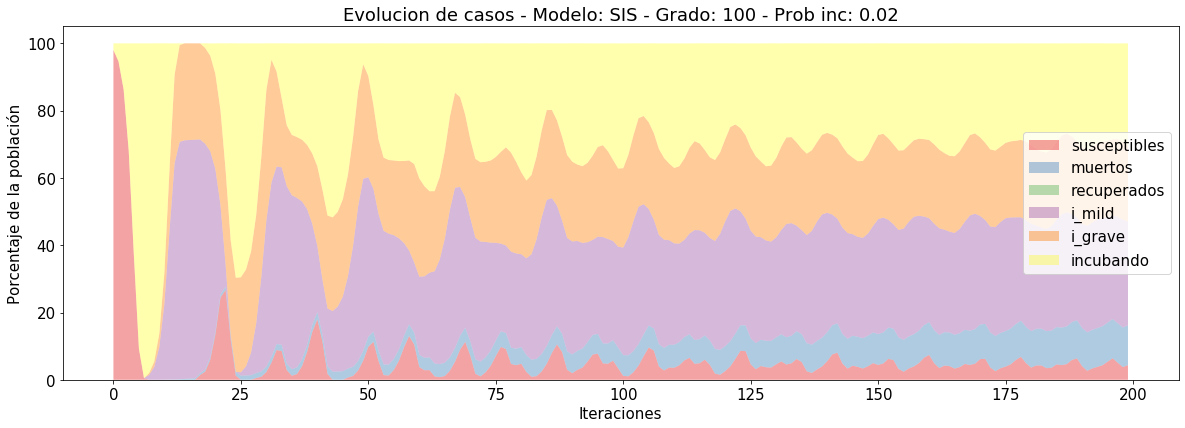

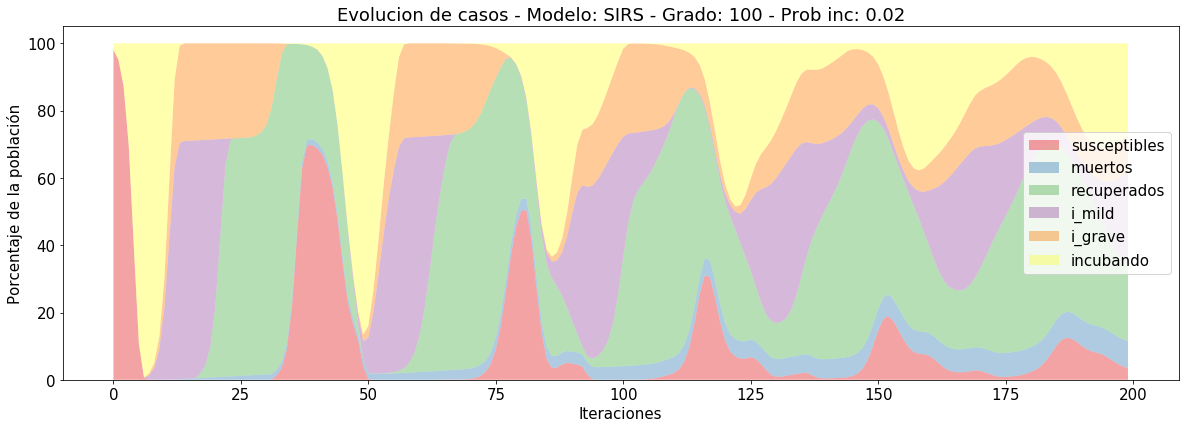

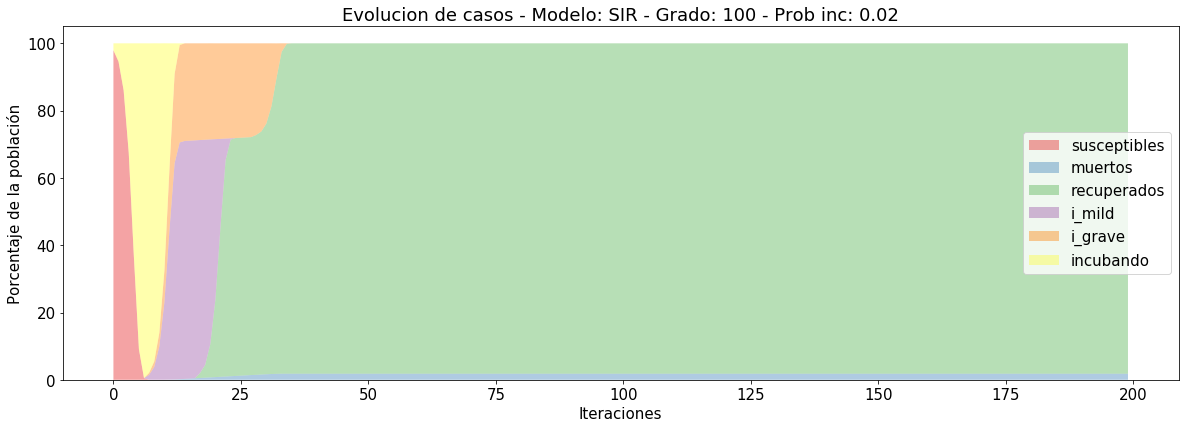

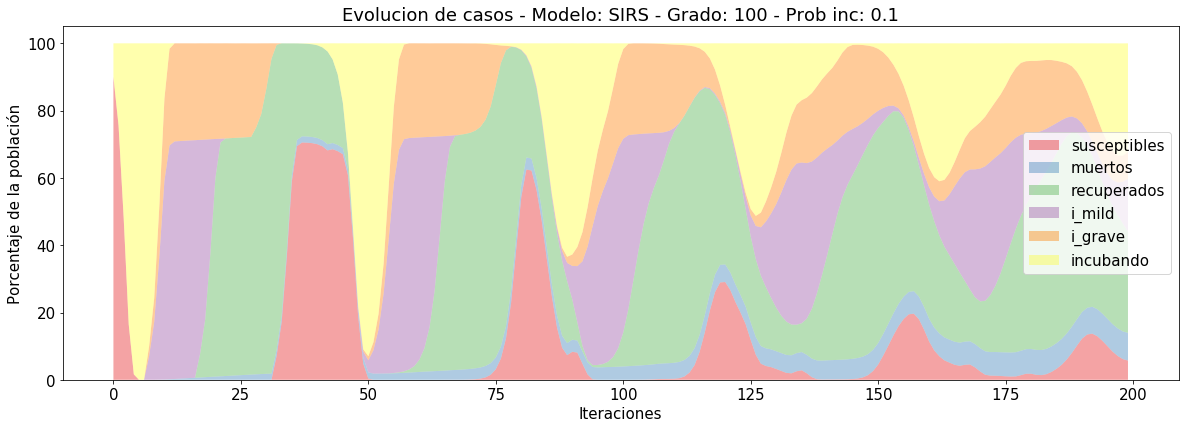

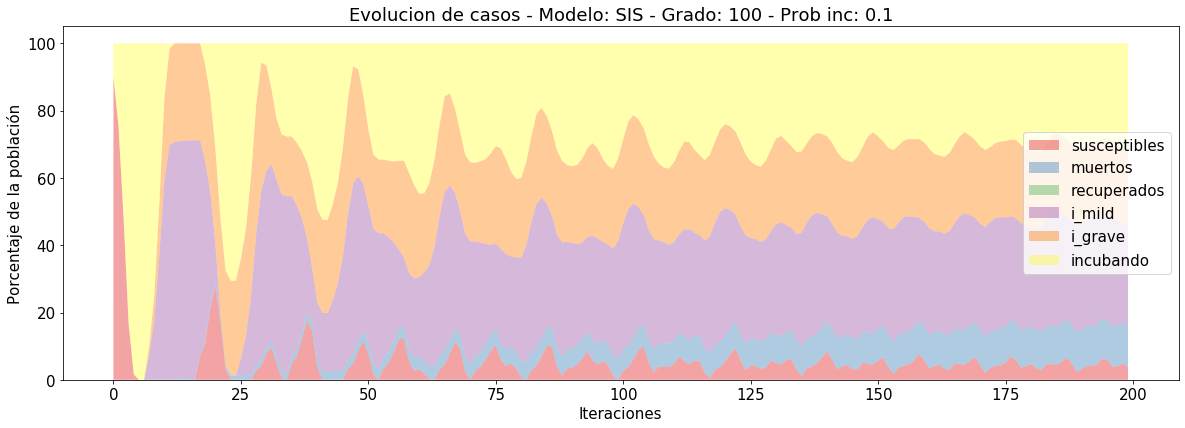

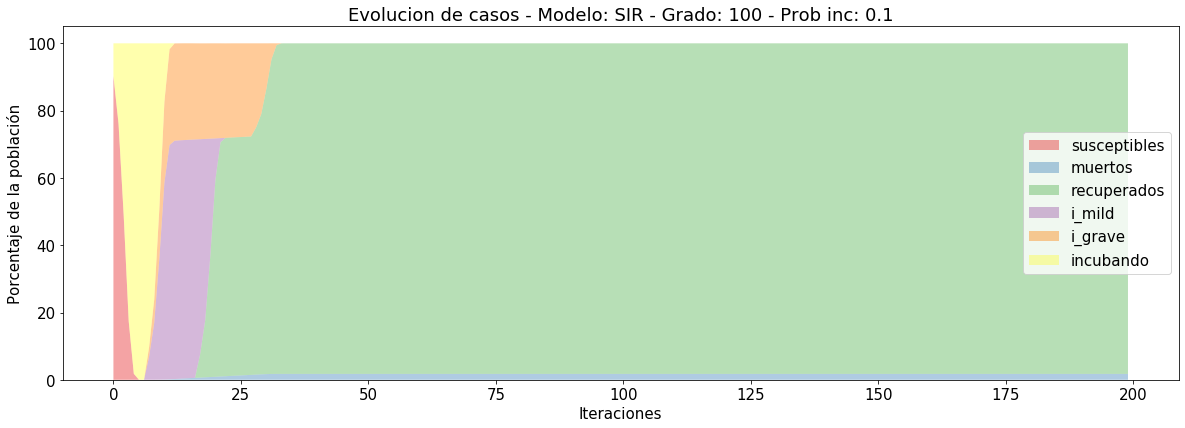

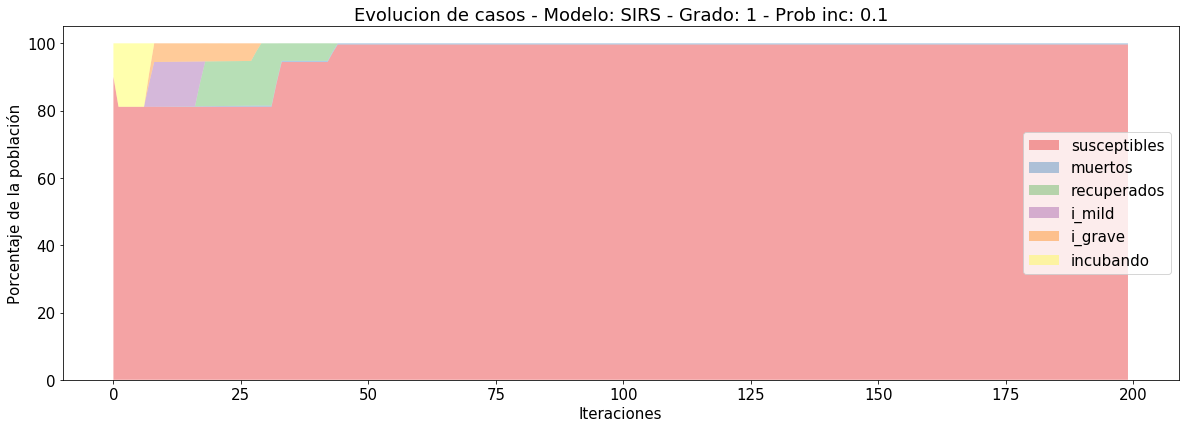

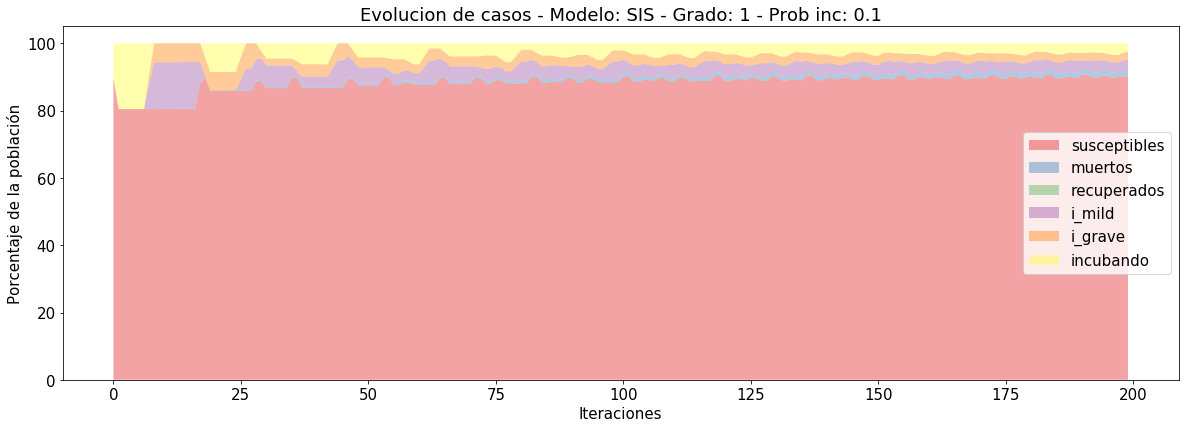

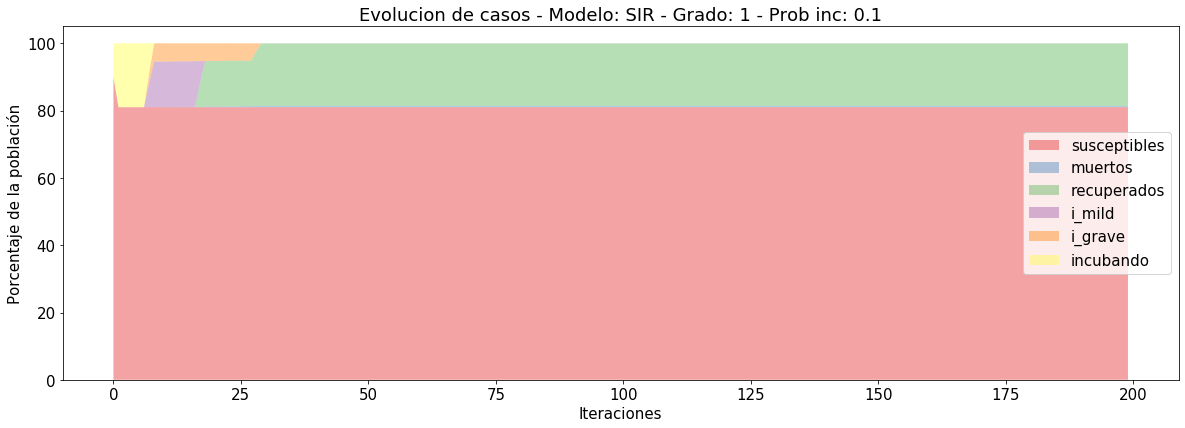

In [2]:
# modelo = ['SIS', 'SIRS', 'SIR']
# porc_incub = ['0.01', '0.02', '0.1'] #500, 1000, 5000
# grado = ['1','10','100','1000']
            
def graficar_modelo(df, modelo, grado, pi, mostrar_susceptibles):
    pal = sns.color_palette("Set1")
    alpha = 0.4
    recuperados = []
    labels = []
    
    if mostrar_susceptibles:
        labels.append('susceptibles')
    df_gr = df.loc[df['gr'] == grado].reset_index(drop=True)
    df_gr_pi = df_gr[df_gr['pi'] == pi].reset_index(drop=True)
    x = range(0,len(df_gr_pi))
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 6.5)
    labels = labels + ['muertos', 'recuperados', 'i_mild','i_grave','incubando']
    if mostrar_susceptibles:
        ax.stackplot(x,df_gr_pi['susceptibles'],df_gr_pi['muertos'], df_gr_pi['recuperados'],df_gr_pi['i_mild'], df_gr_pi['i_grave'], df_gr_pi['incubando'], labels=labels, colors=pal, alpha=alpha)
    else:
        ax.stackplot(x,df_gr_pi['muertos'], df_gr_pi['recuperados'],df_gr_pi['i_mild'], df_gr_pi['i_grave'], df_gr_pi['incubando'], labels=labels, colors=pal, alpha=alpha)
        
    ax.legend(loc='right')
    titulo = "Evolucion de casos - Modelo: " + modelo + " - Grado: " + str(grado) + ' - Prob inc: ' + str(pi)
    plt.title(titulo)
    plt.xlabel("Iteraciones")
    plt.ylabel("Porcentaje de la población")
    plt.show()

# graficar_modelo(df_SIRS, 'SIRS',1, 0.01, False)
# graficar_modelo(df_SIRS, 'SIRS',10, 0.01, True)
# graficar_modelo(df_SIRS, 'SIRS',100, 0.01, True)
# graficar_modelo(df_SIRS, 'SIRS',1000, 0.01, True)
# graficar_modelo(df_SIRS, 'SIRS',1, 0.02, False)
# graficar_modelo(df_SIRS, 'SIRS',10, 0.02, True)
# graficar_modelo(df_SIRS, 'SIRS',100, 0.02, True)
# graficar_modelo(df_SIRS, 'SIRS',1000, 0.02, True)
# graficar_modelo(df_SIRS, 'SIRS',1, 0.1, False)
# graficar_modelo(df_SIRS, 'SIRS',10, 0.1, True)
# graficar_modelo(df_SIRS, 'SIRS',100, 0.1, True)
# graficar_modelo(df_SIRS, 'SIRS',1000, 0.1, True)

graficar_modelo(df_SIS, 'SIS',100, 0.02, True)
graficar_modelo(df_SIRS, 'SIRS',100, 0.02, True)
graficar_modelo(df_SIR, 'SIR',100, 0.02, True)

graficar_modelo(df_SIRS, 'SIRS',100, 0.1, True)
graficar_modelo(df_SIS, 'SIS',100, 0.1, True)
graficar_modelo(df_SIR, 'SIR',100, 0.1, True)

graficar_modelo(df_SIRS, 'SIRS',1, 0.1, True)
graficar_modelo(df_SIS, 'SIS',1, 0.1, True)
graficar_modelo(df_SIR, 'SIR',1, 0.1, True)

## Fallecidos SIS vs SIRS vs SIR variando Grado y PI

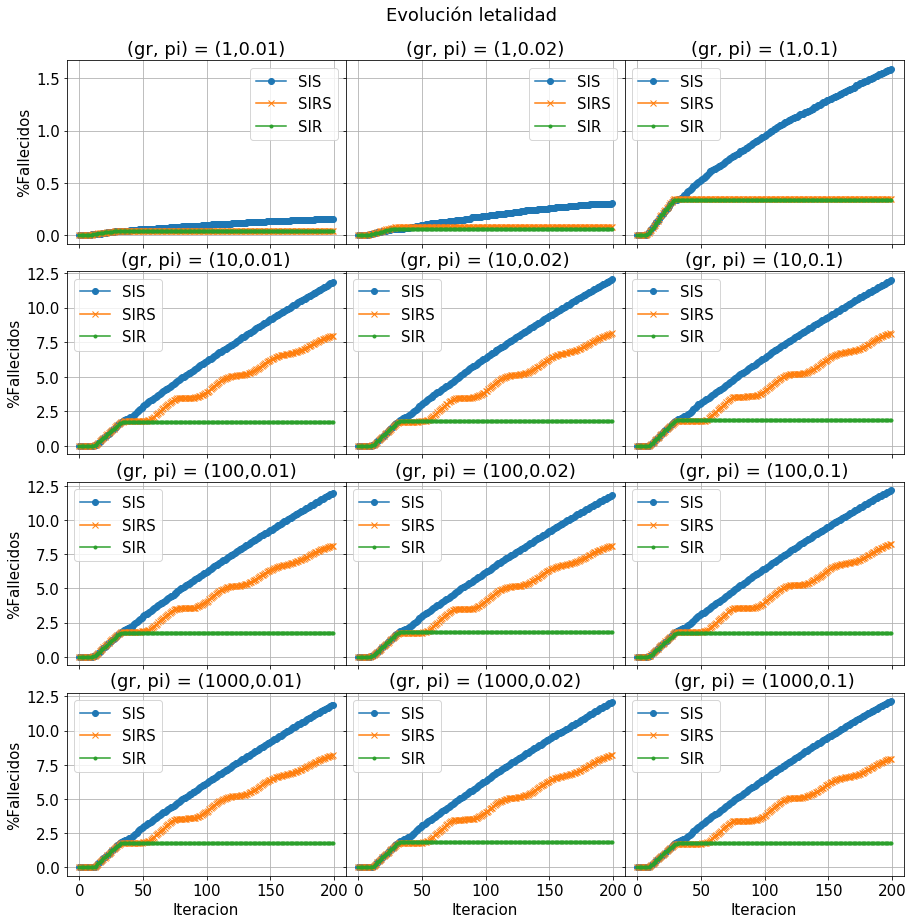

In [3]:
# modelo = ['SIS', 'SIRS', 'SIR']
# porc_incub = ['0.01', '0.02', '0.1'] #500, 1000, 5000
# grado = ['1','10','100','1000']

def graficar_letalidad(grado, pi, axs):
    
    df_T_SIS = mostrar_tabla_gr_pi(df_SIS, grado, pi)
    df_T_SIRS = mostrar_tabla_gr_pi(df_SIRS, grado, pi)
    df_T_SIR = mostrar_tabla_gr_pi(df_SIR, grado, pi)  
    
    axs.title.set_text('(gr, pi) = ('+ str(grado) + ',' + str(pi) + ')')
    axs.plot(df_T_SIS['muertos'], label ='SIS', marker='o')
    axs.plot(df_T_SIRS['muertos'], label='SIRS', marker='x')
    axs.plot(df_T_SIR['muertos'], label='SIR', marker='.')
    axs.legend(loc='best')
    axs.grid(True)
    

graficar_subplots(graficar_letalidad, 'Evolución letalidad', 'Iteracion', '%Fallecidos')

# Evolucion Infectado (gr,pi)

## Evolucion infectados fijando gr y pi

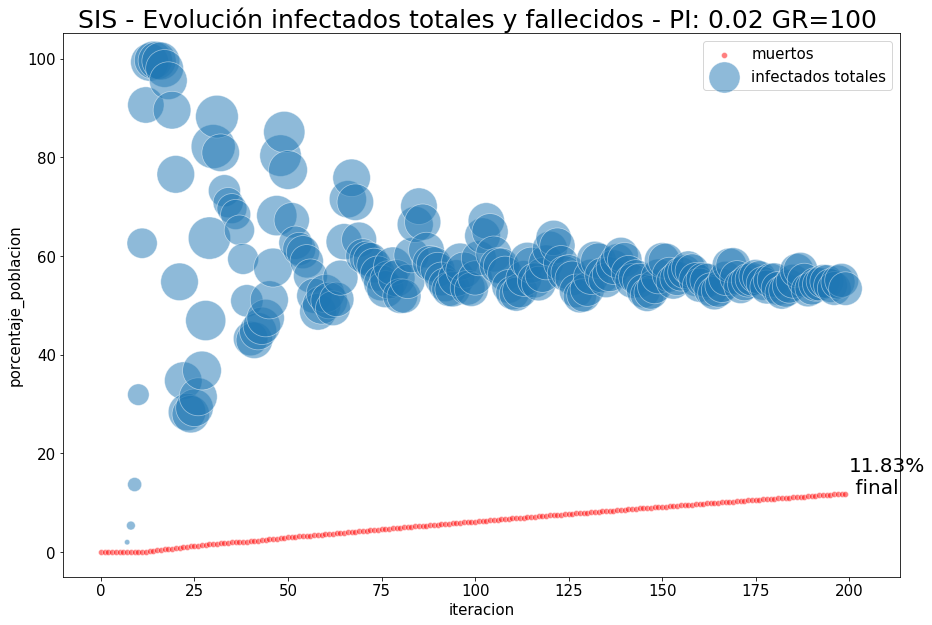

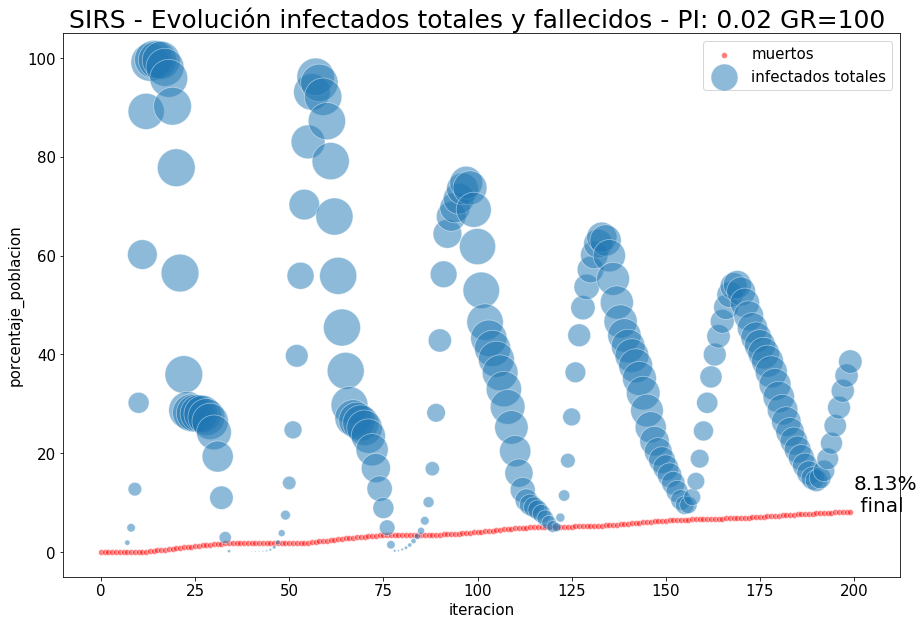

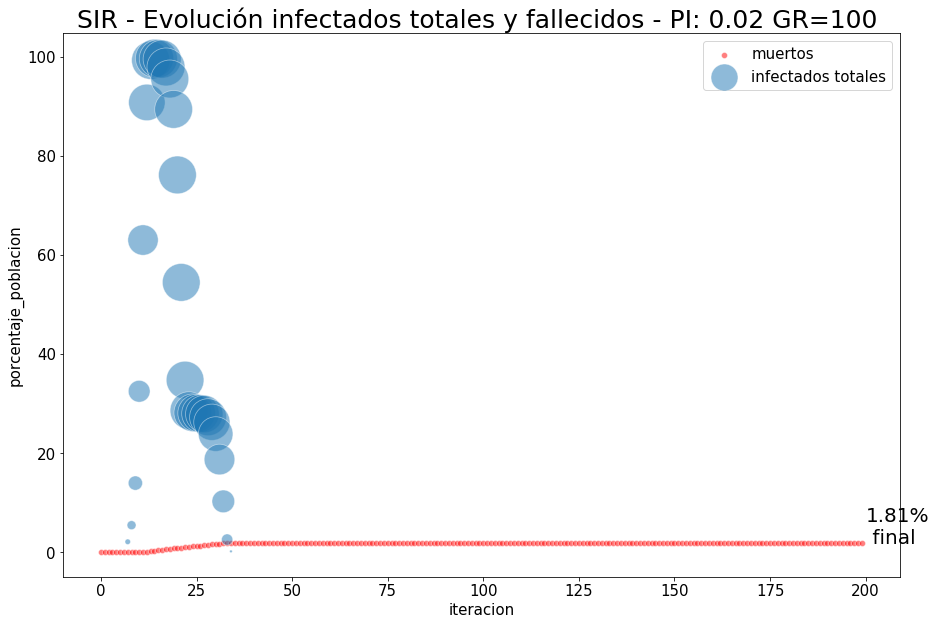

In [9]:

# df_001_SIS = mostrar_tabla(df_SIS, 0.01)
# df_002_SIS = mostrar_tabla(df_SIS, 0.02)
# df_01_SIS =  mostrar_tabla(df_SIS, 0.1)
# df_001_SIRS = mostrar_tabla(df_SIRS, 0.01)
# df_002_SIRS = mostrar_tabla(df_SIRS, 0.02)
# df_01_SIRS = mostrar_tabla(df_SIRS, 0.1)
# df_001_SIR = mostrar_tabla(df_SIR, 0.01)
# df_002_SIR = mostrar_tabla(df_SIR, 0.02)
# df_01_SIR = mostrar_tabla(df_SIR, 0.1)

def graficar_grafico_lindo(df_par, pi, m):
    df_par['inf_tot'] = df_par['i_mild']+ df_par['i_grave']
    df = pd.DataFrame({
    'iteracion': df_par.index,
    'porcentaje_poblacion': df_par['inf_tot'],
    'inf_graves': df_par['i_grave']*50,
    'muertos': df_par['muertos'],
    })
    
    max_muertos = df.at[199,'muertos']

    #Create figure
    plt.figure(figsize = (15,10))
    titulo = m + " - Evolución infectados totales y fallecidos - " +"PI: "+str(pi)+ " GR=100 "
    plt.title(titulo, fontsize=25)
    plt.text(200, max_muertos,str(max_muertos)+'%\n final', fontsize=20) #add text

    
    # Create scatterplot. alpha controls the opacity and s controls the size.
    ax = sns.scatterplot(x=df.iteracion, y=df.muertos, alpha = 0.5, color='r', label='muertos')
    ax = sns.scatterplot(x=df.iteracion, y=df.porcentaje_poblacion, s=df.inf_graves,alpha = 0.5, label='infectados totales')

for m in modelos:
        if m == 'SIS':
            df = df_SIS
        elif m == 'SIRS':
            df = df_SIRS
        elif m == 'SIR':
            df = df_SIR
        df_aux = mostrar_tabla(df, 0.02)
        graficar_grafico_lindo(df_aux, 0.02, m)



In [10]:
def graficar_infectados(grados, pis, modelo):

    #Create figure
    plt.figure(figsize = (20,6.5))
    titulo = "Evolución infectados totales - Modelo:"+modelo 
    plt.title(titulo, fontsize=20)
    for grado in grados:
        for pi in pis:
            df = tabla_infectados(grado, pi, modelo)  
            lbl = 'gr='+str(grado)+' pi='+str(pi)
            ax = sns.scatterplot(x=df.iteracion, y=df.porcentaje_poblacion, alpha = 0.5, label=lbl)

## % Infectados + Muertes variando gr y fijando pi

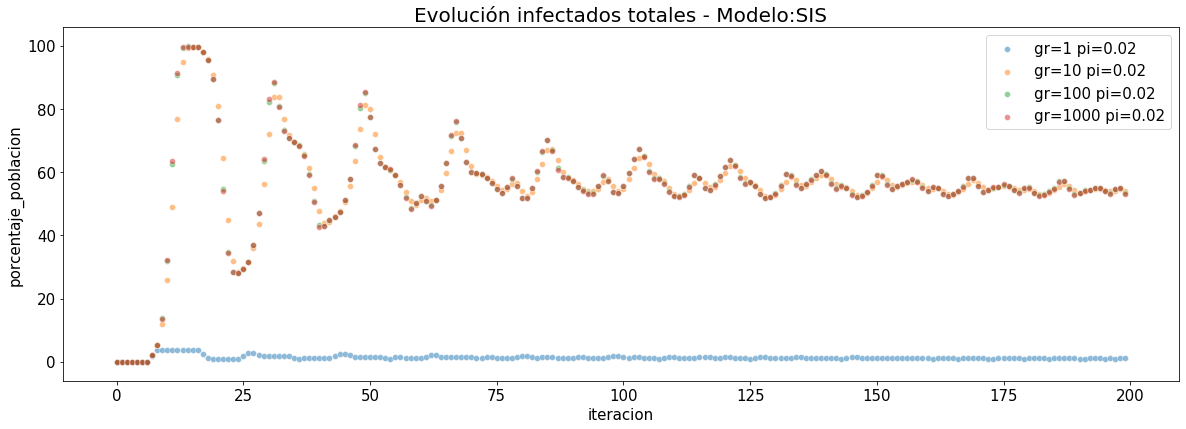

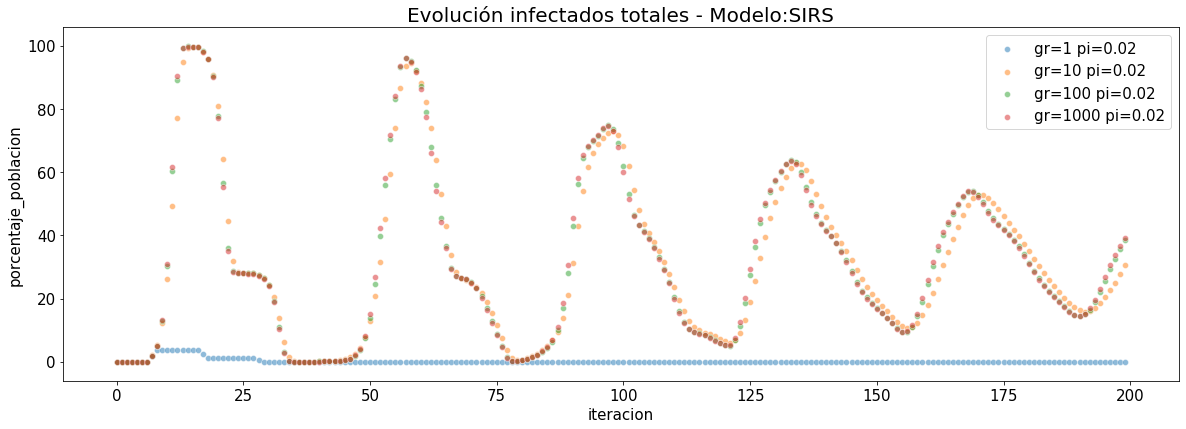

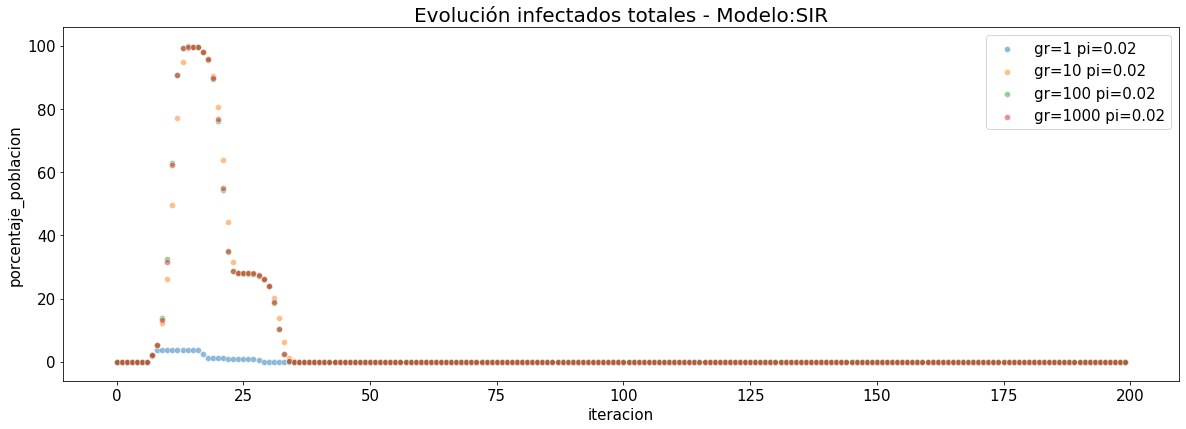

In [11]:

for m in modelos:
    for pi in [0.02]:
        graficar_infectados(grados,[pi],m)

## % Infectados + Muertes fijando gr y variando pi

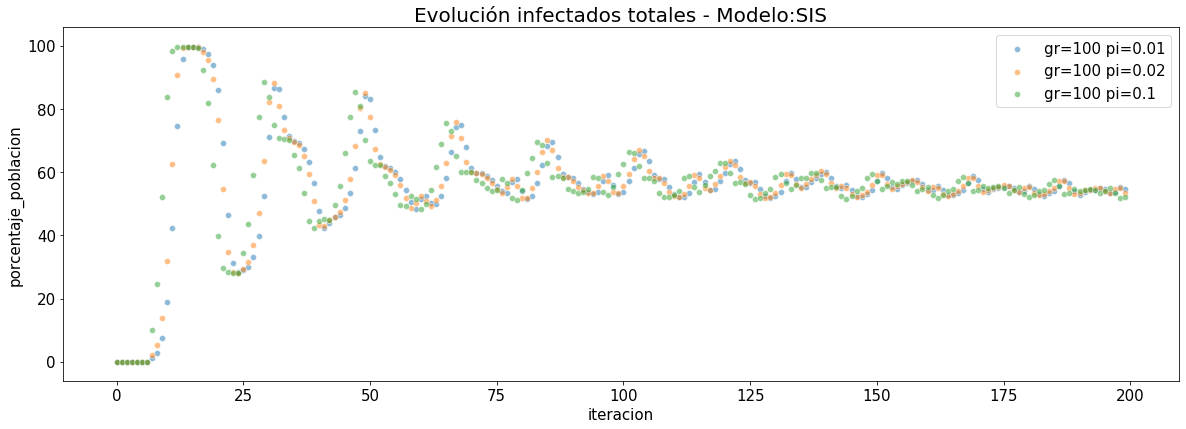

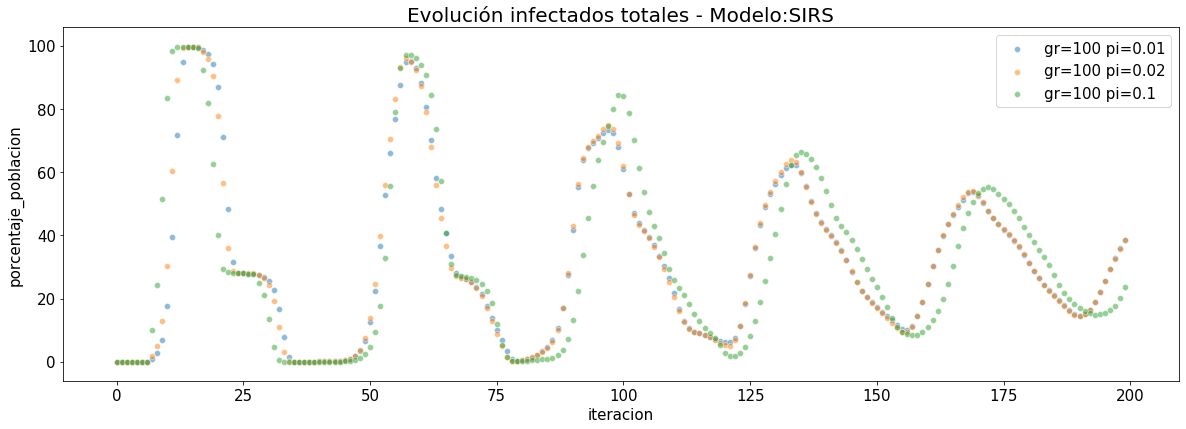

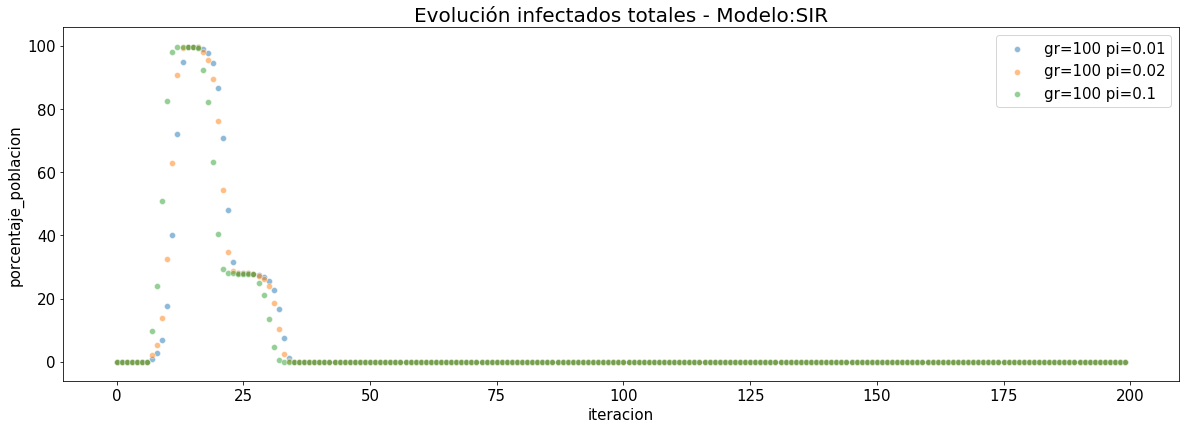

In [12]:
for m in modelos:
    for gr in [100]:
        graficar_infectados([gr],pis,m)

## Estabilidad

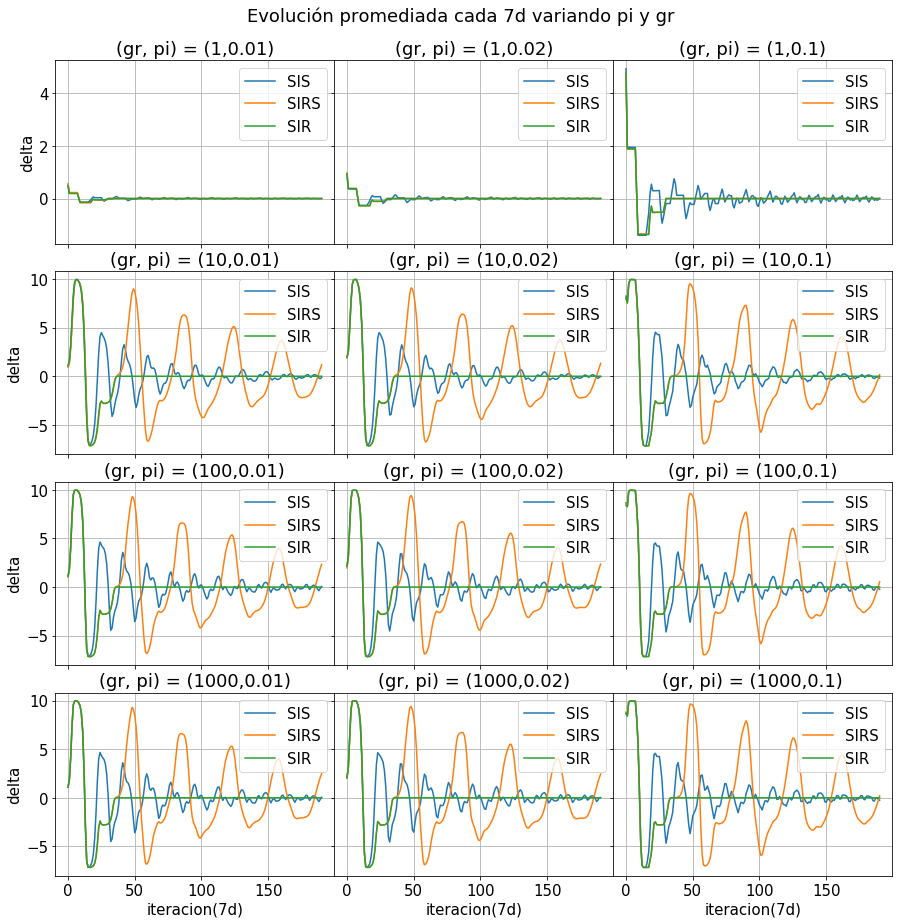

In [13]:
#3 Histogramas juntos, donde cada uno tendrá las combinaciones de X=(gr,pi) y en Y= tiempo hsata estabilidad


def calcular_estabilidad(serie, tamano_delta):
    evolucion = []
    prev = 0
    splits = 10
    serie = [sum(serie[i:i + splits])/splits 
          for i in range(len(serie) - splits + 1)] #Hago una media de 10 dias para suavizar la curva
    for x in serie:
        evolucion.append(x - prev)
        prev = x 
    return evolucion
    

def devolver_estabilidad(df, gr, pi):
    df = mostrar_tabla_gr_pi(df, gr, pi)
    df['inf_tot'] = df['i_mild']+ df['i_grave']
    serie_inf_tot = df['inf_tot']
    evolucion = calcular_estabilidad(serie_inf_tot, 10)
    return evolucion

def graficar_estabilidad(gr, pi, axs):
    axs.grid(True)
    axs.title.set_text('(gr, pi) = ('+ str(gr) + ',' + str(pi) + ')')
    axs.plot(devolver_estabilidad(df_SIS, gr, pi), label='SIS')
    axs.plot(devolver_estabilidad(df_SIRS, gr, pi), label='SIRS')
    axs.plot(devolver_estabilidad(df_SIR, gr, pi), label='SIR')
    axs.legend(loc='best')
    

graficar_subplots(graficar_estabilidad, 'Evolución promediada cada 7d variando pi y gr', 'iteracion(7d)', 'delta')

## Run Simulator - Experimento 2